                               **SCHOLAR NURTURE**

**Research Problem**: Finding a House to buy or rent which fits perfectly to your budget can be really difficult. Most buyers have to go through a number of agent and processes and still come out indecisive. A number of factors can be taken into consideration before deciding how and where to Search for Houses. Some of these factors are Capital, location, house size and usable space, proximity to market, house age and condition, closeness to main roads etc. This problem can be mitigated by training a Machine Model to predict house prices. This will give both buyers, sellers and agents better insights on House prices, for decision making.

**Objective**: To build a model that can predict House prices in King Country, Washington State, USA.

**DATA Description**:
<br> **id**: a notation for a house Numeric
<br> **date**: Date house was sold String
<br> **price**: Price is prediction target Numeric
<br> **bedrooms**: Number of Bedrooms/House Numeric
<br> **bathrooms**: Number of bathrooms/bedrooms Numeric
<br> **sqftliving**: square footage of the home Numeric
<br> **sqftlot**: square footage of the lot Numeric
<br> **floors**: Total floors (levels) in house Numeric
<br> **waterfront**: House which has a view to a waterfront Numeric
<br> **view**: Has been viewed Numeric
<br> **condition**: How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent.(http://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g) Numeric
<br> **grade**: overall grade given to the housing unit, based on King Country grading system. 1 poor ,13 excellent. Numeric
<br> **sqftabove**: square footage of house apart from basement Numeric 
<br> **sqftbasement**: square footage of the basement Numeric
<br> **yrbuilt**: Built Year Numeric yrrenovated Year when house was renovated Numeric
<br> **zipcode**: zip Numeric
<br> **lat**: Latitude coordinate Numeric
<br> **long**: Longitude coordinate Numeric
<br> **sqftliving15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area Numeric 
<br> **sqftlot15** lotSize area in 2015(implies-- some renovations) Numeric


In [ ]:
import io
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
#ignoring warnings
warnings.filterwarnings("ignore")

## Data Wrangling

In [ ]:
#Uploading csv file
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
house_data = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

In [ ]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
house_data.isnull().sum().sum() #No missing, null or Nan values

0

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Bath rooms and floors should not be in float data type. So we will convert floors and bathrooms to integers.**

In [ ]:
#converting floats to Integer
house_data['bathrooms'] = house_data['bathrooms'].astype(int)
house_data['floors'] = house_data['floors'].astype(int)

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  int64  
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  int64  
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Exploratory Data Analysis

** Checking the various Average House Price **

In [ ]:
#Creating a Series containing average prices based on the number of bedrooms
bed_temp = house_data[['price', 'bedrooms']]
bed_temp = bed_temp.groupby(by = ['bedrooms']).mean()
bed_temp = bed_temp.apply(lambda x: round(x))
 
#Creating a Series containing average prices based on the number of bathrooms
bath_temp = house_data[['price', 'bathrooms']]
bath_temp = bath_temp.groupby(by = ['bathrooms']).mean()
bath_temp = bath_temp.apply(lambda x: round(x))
 
#Creating a Series containing average prices based on the House condition
condition_temp = house_data[['price', 'condition']]
condition_temp = condition_temp.groupby(by = ['condition']).mean()
condition_temp = condition_temp.apply(lambda x: round(x))
 
#Creating a Series containing average prices based on the King Country House grade
grade_temp = house_data[['price', 'grade']]
grade_temp = grade_temp.groupby(by = ['grade']).mean()
grade_temp = grade_temp.apply(lambda x: round(x))

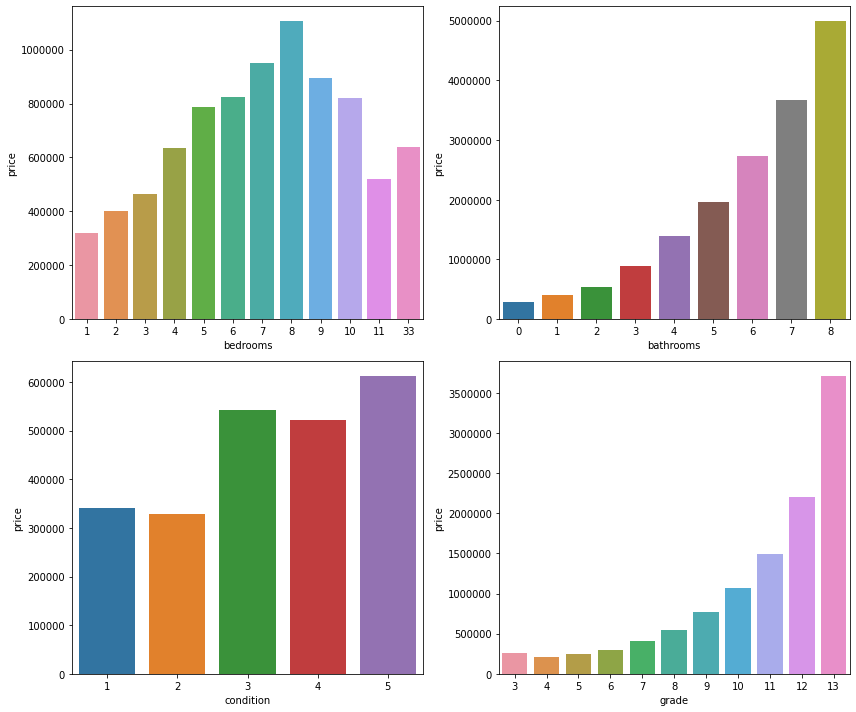

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
#plotting the house prices by the number of bedrooms
sns.barplot(x = bed_temp.index, y = 'price', data = bed_temp, ax =ax[0,0])
#this removes the scientific notation from the y axis
ax[0,0].ticklabel_format(style = 'plain', axis = 'y')
#plotting the house prices by the number of bathrooms
sns.barplot(x = bath_temp.index, y = 'price', data = bath_temp, ax =ax[0,1])
ax[0,1].ticklabel_format(style = 'plain', axis = 'y')
#plotting the house prices by the House condition
sns.barplot(x = condition_temp.index, y = 'price', data = condition_temp, ax =ax[1,0])
ax[1,0].ticklabel_format(style = 'plain', axis = 'y')
#plotting the house prices by the number of bedrooms
sns.barplot(x = grade_temp.index, y = 'price', data = grade_temp, ax =ax[1,1])
ax[1,1].ticklabel_format(style = 'plain', axis = 'y')
plt.tight_layout()
plt.show()

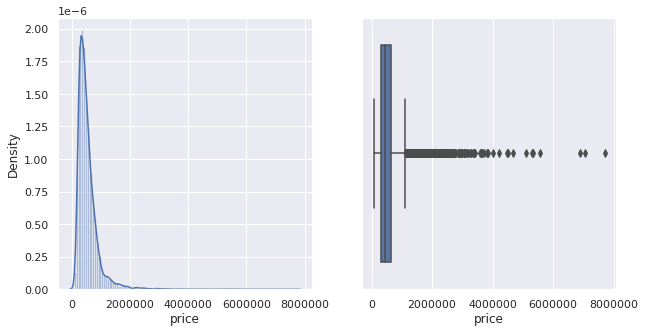

In [ ]:
#distribution of House prices
sns.set()
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(house_data['price'], bins = 100, ax = ax[0])
ax[0].ticklabel_format(style = 'plain', axis = 'x')
sns.boxplot(x = 'price', data = house_data, ax = ax[1])
ax[1].ticklabel_format(style = 'plain', axis = 'x')
plt.show()

Evidence of Outliers. To deal with this, We can find the Log of the House Prices.

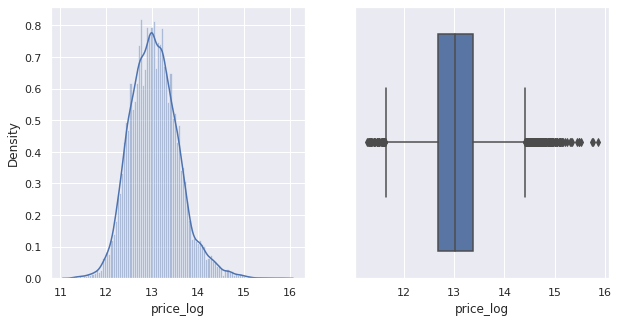

In [ ]:
house_data['price_log'] = np.log(house_data.price)
#Distribution of House Prices after the Log
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(house_data['price_log'], bins = 100, ax = ax[0])
ax[0].ticklabel_format(style = 'plain', axis = 'x')
sns.boxplot(x = 'price_log', data = house_data, ax = ax[1])
ax[1].ticklabel_format(style = 'plain', axis = 'x')
plt.show()

**Note: The Prices now look more Normally Distribution than before.**

** Checking the Correlation between Price and bedrooms. **

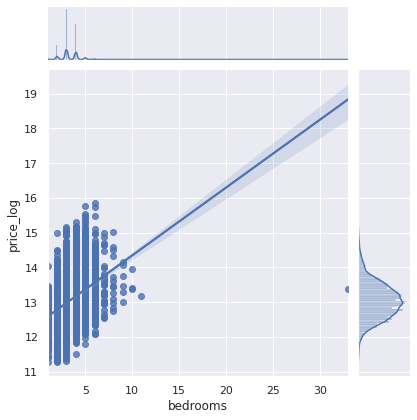

In [ ]:
sns.jointplot(x = 'bedrooms', y = 'price_log', data = house_data, kind = 'reg')

** Doing same for Grade **

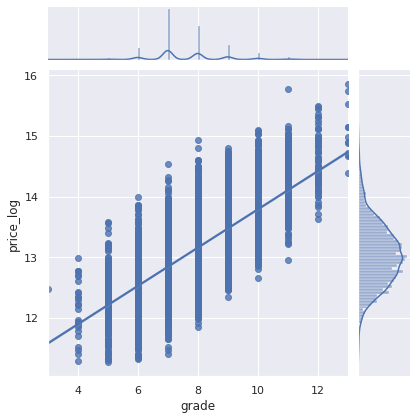

In [ ]:
sns.jointplot(x = 'grade', y = 'price_log', data = house_data, kind = 'reg')

**Checking the types of relationships across the entire data set.**

In [ ]:
#Creating a copy of the House dataset
data = house_data.copy()
#reaplacing prices with their log
data['price'] = data['price_log']
#dropping House Id, sales date and price log
data.drop(labels = ['id', 'date', 'price_log'], axis = 1, inplace = True)

In [ ]:
#Rearranging the columns
data.columns
data = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price']]
data.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614


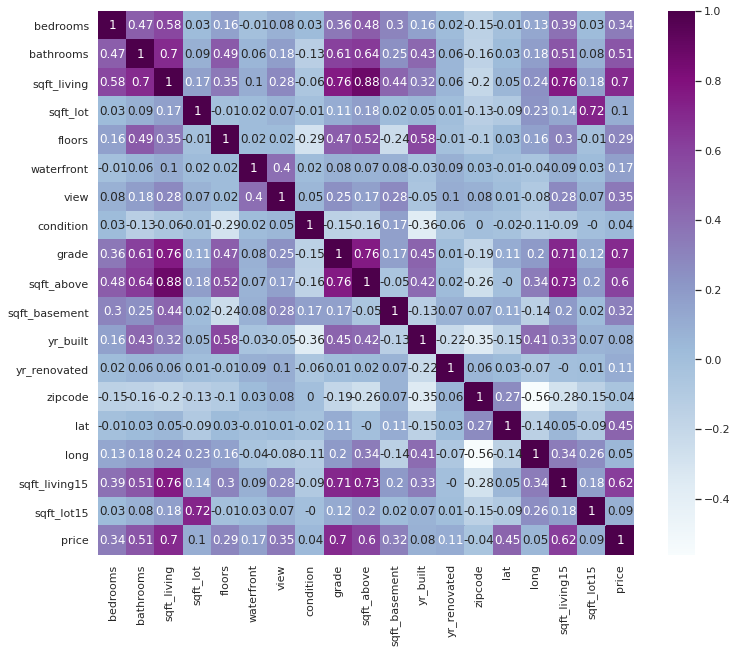

In [ ]:
price_corr = data.corr()
#rounding the values to two decimal place
price_corr = price_corr.apply(lambda x: round(x, 2))
 
fig = plt.figure(figsize= (12,10))
sns.heatmap(price_corr, annot = True, cmap = "BuPu")

### Model Building
** Using three Regression Models to Predict House Prices and comparing their Performance **

In [ ]:
#imports all neccessary libraries for modelling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
features = data.drop(labels = 'price', axis = 1)
target = data.price

#### Splitting the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 1)

In [ ]:
X_train.shape, X_test.shape

((15117, 18), (6480, 18))

In [ ]:
# let make a function that will fit and score the model
models = {"Linear Regression": LinearRegression(),
          "Random Forest": RandomForestRegressor(n_estimators = 100, random_state = 1),
         "Decision Tree": DecisionTreeRegressor()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    X_train:training data with features but no label
    X_test: test data with features but no label
    y_train: training data with label but no features
    y_test: test data with label with no features
    """
    model_score = {}
    #create a for loop to loop through the dictionary 
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [ ]:
fit_and_score(models,X_train,X_test,y_train,y_test)

{'Decision Tree': 0.7709842973093879,
 'Linear Regression': 0.766794673189912,
 'Random Forest': 0.8819071306647366}

### Model Evaluation

In [ ]:
#Creating an empty dataframe for the Model evaluation
model_eval = pd.DataFrame(columns = ['Model', 'R2_Score', 'MAE', 'MSE', 'RMSE'])
model_eval

,Model,R2_Score,MAE,MSE,RMSE


In [ ]:
def model_evaluation(X_train, X_test, y_train, y_test, models, df, X, y):
    '''
    This function Evaluates the Model, R2 score, MAE, MSE, RMSE and Cross validation score
    also enters the score into model1_eval Dataframe
    '''
    # 'c' represents the index for each entry
    c = 0
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #Filling the dataframe
        df.loc[c, 'Model'] = name
        df.loc[c, 'R2_Score'] = r2_score(y_test, y_pred)
        df.loc[c, 'MAE'] = mean_absolute_error(y_test, y_pred)
        df.loc[c, 'MSE'] = mean_squared_error(y_test, y_pred)
        df.loc[c, 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
        c += 1
    return df

In [ ]:
model_evaluation(X_train, X_test, y_train, y_test, models, model_eval, features, target)

,Model,R2_Score,MAE,MSE,RMSE
0,Linear Regression,0.766795,0.195768,0.0646274,0.254219
1,Random Forest,0.881907,0.127143,0.0327267,0.180905
2,Decision Tree,0.768616,0.180294,0.0641227,0.253225


## Summary
From the Model Evaluation, Random Forest Performed better than the Other Models. This Summary will be based on **Random Forest Regressor**.

** Training a Random Forest to evaluate its prediction on the Test Set **

In [ ]:
reg_model = RandomForestRegressor(random_state = 1)
reg_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
y_pred = reg_model.predict(X_test)
y_pred

array([12.34273738, 12.74517822, 12.67069386, ..., 13.66675051,
       12.71944019, 13.17501747])

In [ ]:
#the predicted House Prices are still in their log form
#for us to understand the figures, i will convert them to their original values
prediction = list(round(i,1) for i in np.exp(y_pred))
print(prediction[:10])

[229288.7, 342894.5, 318282.3, 361223.0, 608484.2, 338037.1, 405937.5, 256062.8, 704436.6, 508996.5]


### Coefficients of the Features

In [ ]:
coeff = pd.DataFrame(reg_model.feature_importances_, features.columns)
coeff.columns = ['Coefficient']
coeff

,Coefficient
bedrooms,0.003068
bathrooms,0.001967
sqft_living,0.179979
sqft_lot,0.016958
floors,0.000945
waterfront,0.005321
view,0.009570
condition,0.005307
grade,0.342962
sqft_above,0.016429


### From the Above Coefficients, Housing Grade; which is the overall grade given to the housing unit, based on King Country grading system (1 poor ,13 excellent), with every other thing remaining constant, Has the Highest Influence to House pricing.